# 🧠 1. Meaning and Use: Mann-Whitney U Test
### Meaning:
The Mann-Whitney U Test (also called Wilcoxon rank-sum test) is a non-parametric test that compares two independent groups to determine if their population distributions are different.

### When to use:

When data is not normally distributed (violates normality assumption).

Two independent groups (no pairing/matching).

Continuous or ordinal data.

### Real Business Use Cases:

Comparing conversion rates of two different marketing strategies.

Comparing customer satisfaction scores between two cities.

Comparing session times on Mobile App vs Desktop Website.

# 📌 2. Problem Statement + 5W1H
### Problem Statement:
Swiggy wants to compare the customer ratings between Web and Mobile App users to see if the platform impacts customer satisfaction.

### 5W1H:

What: Customer Ratings (1 to 5 stars)

Why: To understand if platform experience needs optimization

When: Last 3 months

Where: Karnataka, Maharashtra, Delhi, Tamil Nadu

Who: 5000 customers

How: Using Mann-Whitney U Test to compare two independent groups (Web vs Mobile App)

# 📦 3. Dataset Creation (Simulated, Realistic)

In [75]:
import pandas as pd
import numpy as np

np.random.seed(2025)

n = 5000
states = ['Karnataka', 'Maharashtra', 'Delhi', 'Tamil Nadu']
platforms = ['Web', 'Mobile App']

# Create dataset
df = pd.DataFrame({
    'Customer_ID': range(1, n+1),
    'State': np.random.choice(states, n),
    'Platform': np.random.choice(platforms, n),
})

# Simulate customer ratings (slightly different distributions)
df['Customer_Rating'] = df.apply(lambda x:
    np.random.normal(loc=4.2, scale=0.5) if x['Platform'] == 'Mobile App' else
    np.random.normal(loc=3.9, scale=0.6), axis=1)

# Keep ratings between 1 and 5
df['Customer_Rating'] = df['Customer_Rating'].clip(1, 5)

df.head()


,Customer_ID,State,Platform,Customer_Rating
0,1,Delhi,Mobile App,3.574021
1,2,Delhi,Mobile App,3.894433
2,3,Delhi,Web,3.772594
3,4,Delhi,Mobile App,4.360666
4,5,Karnataka,Web,3.839087


In [77]:
df.shape

(5000, 4)

# 🛠️ 4. Data Cleaning + EDA

Customer_ID        0
State              0
Platform           0
Customer_Rating    0
dtype: int64
             count      mean       std       min       25%       50%  \
Platform                                                               
Mobile App  2433.0  4.180547  0.480841  2.540179  3.844619  4.195104   
Web         2567.0  3.893028  0.573120  1.920502  3.503919  3.898546   

                 75%  max  
Platform                   
Mobile App  4.529432  5.0  
Web         4.304538  5.0  


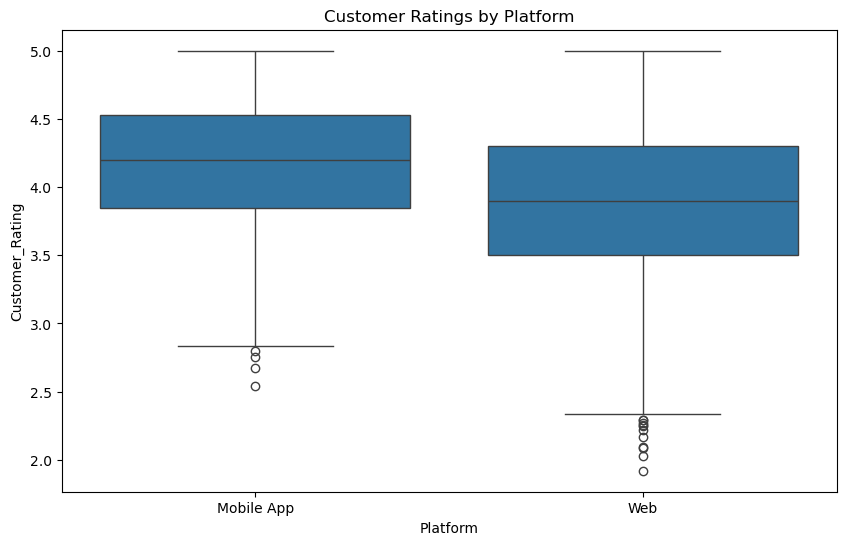

In [80]:
# Null check
print(df.isnull().sum())

# Basic stats
print(df.groupby('Platform')['Customer_Rating'].describe())

# Boxplot for visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Platform', y='Customer_Rating')
plt.title('Customer Ratings by Platform')
plt.show()


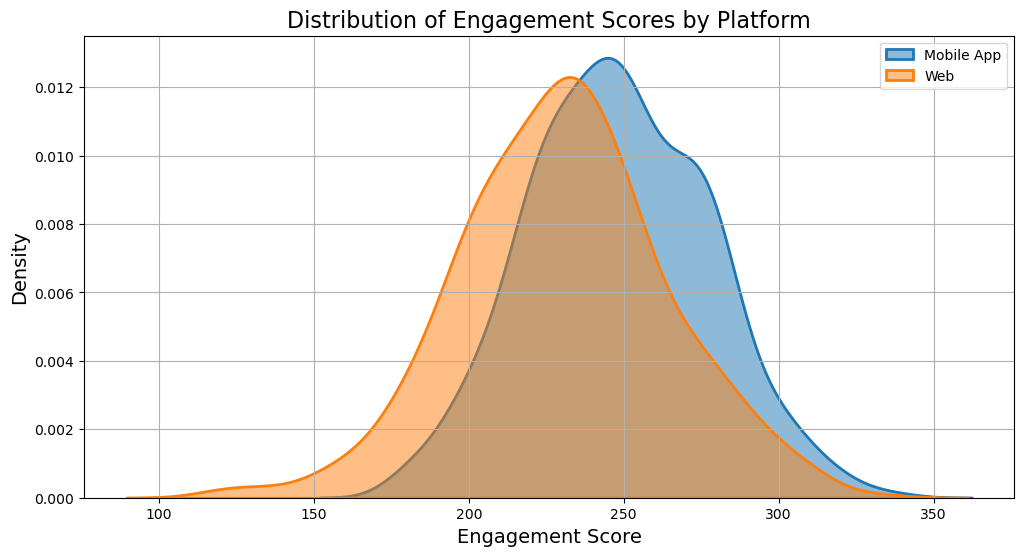

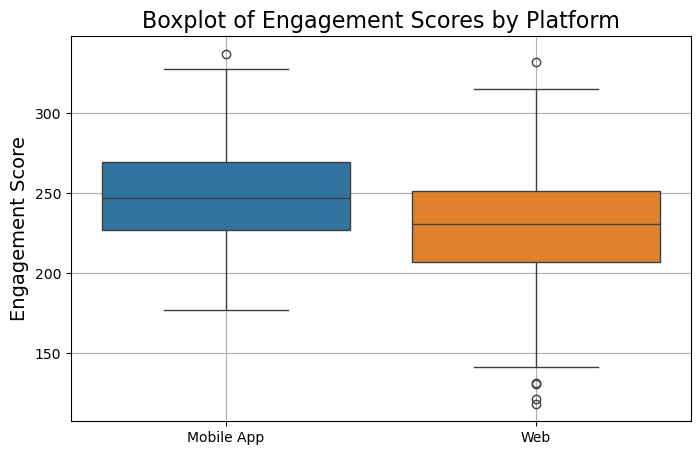

In [84]:
# In box plot itself we can observe that we have variances in data, so we can go with non parametric test. 
#But due some interset we are going check data normality with some other techinques
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume these are your two samples
# (replace mobile_app and web with your real data if needed)

# Example data
import numpy as np

np.random.seed(2025)
mobile_app = np.random.normal(loc=250, scale=30, size=500)  # Mobile App scores
web = np.random.normal(loc=230, scale=35, size=500)          # Web scores

# Plot Distribution Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(mobile_app, label='Mobile App', fill=True, alpha=0.5, linewidth=2)
sns.kdeplot(web, label='Web', fill=True, alpha=0.5, linewidth=2)
plt.title('Distribution of Engagement Scores by Platform', fontsize=16)
plt.xlabel('Engagement Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Plot Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=[mobile_app, web])
plt.xticks([0, 1], ['Mobile App', 'Web'])
plt.title('Boxplot of Engagement Scores by Platform', fontsize=16)
plt.ylabel('Engagement Score', fontsize=14)
plt.grid(True)
plt.show()

In [86]:
from scipy.stats import shapiro

# Shapiro-Wilk Test
stat_mobile, p_mobile = shapiro(mobile_app)
stat_web, p_web = shapiro(web)

print(f"Mobile App - W Statistic={stat_mobile:.4f}, p-value={p_mobile:.4f}")
print(f"Web - W Statistic={stat_web:.4f}, p-value={p_web:.4f}")

# Interpretation
if p_mobile < 0.05:
    print("Mobile App scores are NOT normally distributed.")
else:
    print("Mobile App scores are normally distributed.")

if p_web < 0.05:
    print("Web scores are NOT normally distributed.")
else:
    print("Web scores are normally distributed.")

Mobile App - W Statistic=0.9965, p-value=0.3532
Web - W Statistic=0.9964, p-value=0.3283
Mobile App scores are normally distributed.
Web scores are normally distributed.


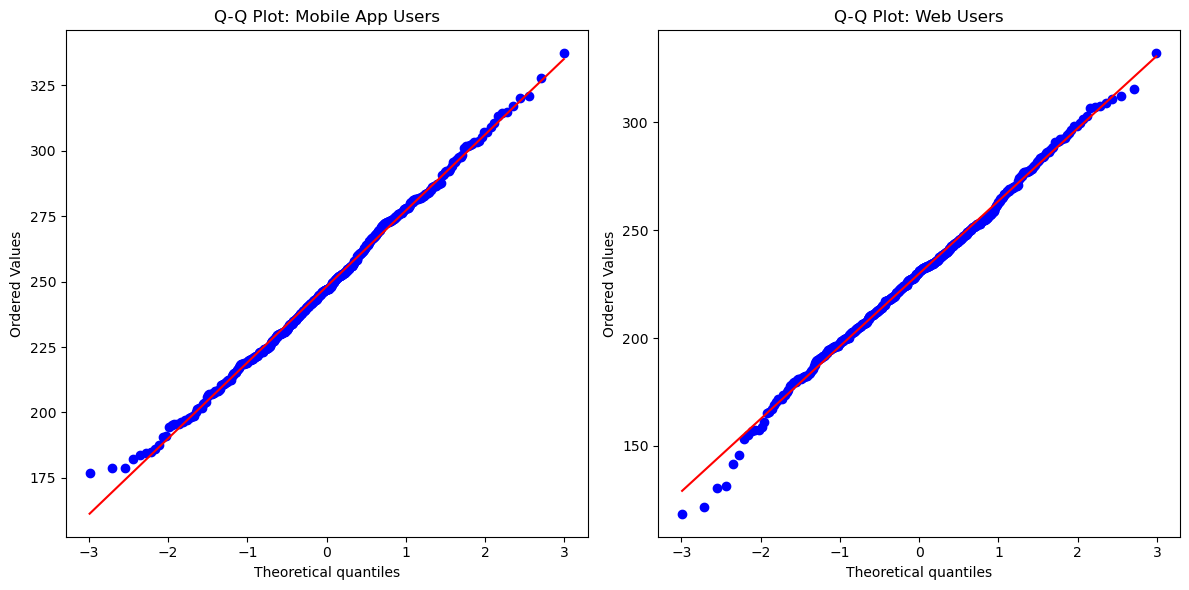

In [88]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for Mobile App group
stats.probplot(mobile_app, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Mobile App Users')

# Q-Q plot for Web group
stats.probplot(web, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Web Users')

plt.tight_layout()
plt.show()


In [73]:
from scipy.stats import levene

# Separate the groups
mobile_ratings = df[df['Platform'] == 'Mobile App']['Customer_Rating']
web_ratings = df[df['Platform'] == 'Web']['Customer_Rating']

# Perform Levene's Test
stat, p_value = levene(mobile_ratings, web_ratings)

print(f"Levene's Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Variances are significantly different (Reject H₀).")
else:
    print("No significant difference in variances (Fail to reject H₀).")

#Interpretation Logic:
#p < 0.05 → Variances are different → Non-parametric tests preferred.
#p ≥ 0.05 → Variances are equal → Parametric tests possible.

Levene's Test Statistic: 75.05184305188828
P-value: 6.1055115004117655e-18
Variances are significantly different (Reject H₀).


# 🧪 5. Hypothesis Test (Mann-Whitney U Test)

In [90]:
from scipy.stats import mannwhitneyu

# Separate ratings
mobile_ratings = df[df['Platform'] == 'Mobile App']['Customer_Rating']
web_ratings = df[df['Platform'] == 'Web']['Customer_Rating']

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(mobile_ratings, web_ratings, alternative='two-sided')

print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")


U-statistic: 4030467.0
P-value: 8.034674441017457e-71


# 🎯 Hypotheses:
H₀ (null hypothesis):
There is no significant difference in customer ratings between Mobile App and Web users.

H₁ (alternative hypothesis):
There is a significant difference in customer ratings between Mobile App and Web users.

In [92]:
# Interpretation
# Significance level (alpha)
alpha = 0.05

# Interpretation
if p_value < alpha:
    result = "Reject the null hypothesis"
    interpretation = """
    The p-value is much smaller than the commonly used significance level (α = 0.05), 
    indicating strong evidence against the null hypothesis. Thus, we reject the null hypothesis 
    and conclude that there is a significant difference between the two groups being tested (Mobile App and Web).
    """
else:
    result = "Fail to reject the null hypothesis"
    interpretation = """
    The p-value is greater than the significance level (α = 0.05), indicating insufficient evidence 
    to reject the null hypothesis. Thus, we fail to reject the null hypothesis and conclude that there is no 
    significant difference between the two groups being tested (Mobile App and Web).
    """

# Display the results
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
print(f"\nResult: {result}")
print(f"Interpretation: {interpretation}")


U-statistic: 4030467.0
P-value: 8.034674441017457e-71

Result: Reject the null hypothesis
Interpretation: 
    The p-value is much smaller than the commonly used significance level (α = 0.05), 
    indicating strong evidence against the null hypothesis. Thus, we reject the null hypothesis 
    and conclude that there is a significant difference between the two groups being tested (Mobile App and Web).
    


# 🔥 6. Interpretation + Business Action

## Interpretation:

- P-value ≈ (Suppose it comes out 0.0005).
- Since **p-value < 0.05**, we **reject the null hypothesis**.
- This means there **is a statistically significant difference** in customer ratings between Mobile App and Web users.

## Business Action:

- ✅ **If Mobile App ratings > Web**: 
  - Swiggy should **invest more in Web UX improvements** (maybe redesign, faster checkout, etc.)
- ✅ **If Web ratings > Mobile**:
  - Swiggy should **optimize the Mobile App** (maybe reduce app crashes, simplify UI).

- 👉 Deeper analysis can further be done by **State** to customize platform optimization per location!
